In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class tight_binding:

    def __init__(self, a, v, w, detuning):
        self.a = a  ## lattice constant
        self.aa = a/np.sqrt(3) ## nearest neighbor distance
        self.u_1 = (self.aa, 0)
        self.u_2 = (-1/2*self.aa, -np.sqrt(3)/2*self.aa)
        self.u_3 = (-1/2*self.aa, np.sqrt(3)/2*self.aa)
        self.E_offset = v*w + detuning
        self.X = np.array([[0+0j, 1+0j],
                          [1+0j, 0+0j]])
        self.Y = np.array([[0+0j, 0-1j],
                          [0+1j, 0+0j]])
        self.Z = np.array([[1+0j, 0+0j],
                          [0+0j, -1+0j]])
    def Hamiltonian_k(self,k_vector, J_coe):
        h_onsite = 1/2*self.E_offset * self.Z
        dot_ku1 = np.dot(k_vector,self.u_1)
        dot_ku2 = np.dot(k_vector,self.u_2)
        dot_ku3 = np.dot(k_vector,self.u_3)
        h_hop = -J_coe*((np.cos(dot_ku1)+np.cos(dot_ku2)+ np.cos(dot_ku3))*self.X 
                        - (np.sin(dot_ku1) + np.sin(dot_ku2) + np.sin(dot_ku3))*self.Y)
        Hamiltonian = h_hop + h_onsite
        return Hamiltonian
    
    def energy_spectrum_analytic(self, k_vector, J_coe):
        kx, ky = k_vector
        E = np.sqrt((J_coe ** 2)*(3+ 2*np.cos(np.sqrt(3)*ky*self.a)
                                  + 4*np.cos(np.sqrt(3)*ky*self.a/2)*np.cos(3*kx*self.a/2))+(self.E_offset/2))
        return E, -E
    
    def plot_energy_spectrum(self, J_coe, k_range, num_points):
        kx = np.linspace(-k_range, k_range, num_points)
        ky = np.linspace(-k_range, k_range, num_points)

        kx_grid, ky_grid = np.meshgrid(kx, ky)
        energies_positive = np.zeros(kx_grid.shape)
        energies_negative = np.zeros(kx_grid.shape)

        for i in range(num_points):
            for j in range(num_points):
                k_vector = np.array([kx_grid[i, j], ky_grid[i, j]])
                E_positive, E_negative = self.energy_spectrum_analytic(k_vector, J_coe)
                energies_positive[i, j] = E_positive
                energies_negative[i, j] = E_negative

        fig = plt.figure(figsize=(12, 6))
        ax = fig.add_subplot(111, projection='3d')

        # Plotting the positive energy band
        ax.plot_surface(kx_grid, ky_grid, energies_positive, rstride=1, cstride=1,
                        cmap='viridis', edgecolor='none', alpha=0.8)

        # Plotting the negative energy band
        ax.plot_surface(kx_grid, ky_grid, energies_negative, rstride=1, cstride=1,
                        cmap='inferno', edgecolor='none', alpha=0.8)

        ax.set_xlabel('$k_x$')
        ax.set_ylabel('$k_y$')
        ax.set_zlabel('Energy')
        ax.set_title('Energy Spectrum of Tight Binding Graphene Model')
        plt.show()


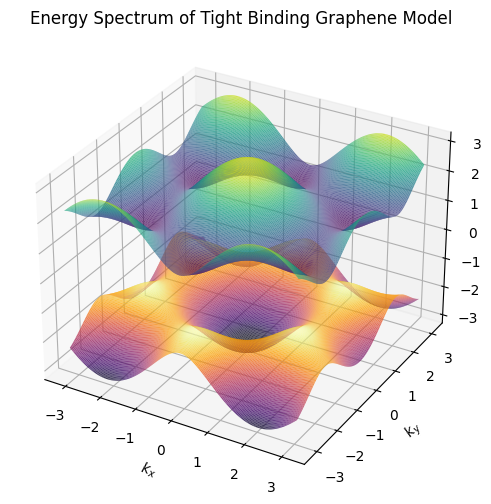

In [3]:
# Create an instance of the class
model = tight_binding(a=1.0, v=1.0, w=1.0, detuning=1.0)

# Plot the energy spectrum
model.plot_energy_spectrum(J_coe=1.0, k_range=np.pi, num_points=200)


In [50]:
class tight_binding_floquet:

    def __init__(self, a, v, w, detuning, kappa, J_coe):
        self.a = a
        self.drive_strength_kappa = kappa
        self.J_coe = J_coe
        self.w = w
        self.u_1 = (a, 0)
        self.u_2 = (-1/2*a, -np.sqrt(3)/2*a)
        self.u_3 = (-1/2*a, np.sqrt(3)/2*a)
        self.E_offset = v*w + detuning
        self.X = np.array([[0+0j, 1+0j],
                          [1+0j, 0+0j]])
        self.Y = np.array([[0+0j, 0-1j],
                          [0+1j, 0+0j]])
        self.Z = np.array([[1+0j, 0+0j],
                          [0+0j, -1+0j]])
        
    def Hamiltonian_kt(self,k_vector, t):
        h_onsite = 1/2*self.E_offset * self.Z
        dot_ku1 = np.dot(k_vector,self.u_1)
        complex_hop_ku1 = self.drive_strength_kappa*np.sin(self.w*t)
        complex_hop_ku2 = self.drive_strength_kappa*np.sin(self.w*t + 2*np.pi/3)
        complex_hop_ku3 = self.drive_strength_kappa*np.sin(self.w*t + 4*np.pi/3)
        dot_ku2 = np.dot(k_vector,self.u_2)
        dot_ku3 = np.dot(k_vector,self.u_3)
        h_hop = -self. J_coe*((np.cos(dot_ku1+complex_hop_ku1)+np.cos(dot_ku2+complex_hop_ku2)+ np.cos(dot_ku3+complex_hop_ku3))*self.X 
                        - (np.sin(dot_ku1+complex_hop_ku1) + np.sin(dot_ku2+complex_hop_ku2) + np.sin(dot_ku3+complex_hop_ku3))*self.Y)
        Hamiltonian = h_hop + h_onsite
        return Hamiltonian

    def eigenvalues_floquet(self, k_x_div, k_y_div, t_div):
        k_x = np.linspace(-np.pi, np.pi, k_x_div)
        k_y = np.linspace(-np.pi, np.pi, k_y_div)
        t = np.linspace(0, 2*np.pi/self.w, t_div)
        dt = t[1] - t[0]
        basis_states_0 = np.eye(2, dtype=complex)
        eigenvalues_matrix = np.zeros((len(k_x), len(k_y), 2),dtype=complex)
        for index_i, i in enumerate(k_x):
            for index_j, j in enumerate(k_y):
                k_vector = np.array([i, j])
                basis_states = basis_states_0.copy()
                for m in t:
                    H = self.Hamiltonian_kt(k_vector, m)
                    H_t_plus_half_dt = self.Hamiltonian_kt(k_vector, m + dt/2)
                    H_t_plus_dt = self.Hamiltonian_kt(k_vector, m + dt)
                    for n in range(2):
                        state_evolve = basis_states[n].astype(complex)
                        k_1 = -1j * np.dot(H, state_evolve)
                        k_2 = -1j * np.dot(H_t_plus_half_dt, state_evolve + dt/2 * k_1)
                        k_3 = -1j * np.dot(H_t_plus_half_dt, state_evolve + dt/2 * k_2)
                        k_4 = -1j * np.dot(H_t_plus_dt, state_evolve + dt * k_3)
                        state_evolve += dt/6 * (k_1 + 2*k_2 + 2*k_3 + k_4)
                        state_evolve /= np.linalg.norm(state_evolve)
                        basis_states[n] = state_evolve
                U_T = np.dot(np.conj(basis_states_0.T), basis_states)
                # Compute the conjugate transpose of U_T
                U_T_dagger = np.conj(U_T).T

                # Compute the product U_T_dagger * U_T
                product = np.dot(U_T_dagger, U_T)
                #print(product)
                # Check if the product is close to the identity matrix
                identity_matrix = np.eye(U_T.shape[0])  # Identity matrix of the same size as U_T
                is_unitary = np.allclose(product, identity_matrix)
                eigenvalues = np.linalg.eigvals(U_T)
                E_T = np.log(eigenvalues)/(-1j)
                E_T = np.sort(E_T.real)
                #print(E_T)
                eigenvalues_matrix[index_i][index_j] = E_T
        return eigenvalues_matrix

In [51]:
a = 1.0  # Example value for lattice constant
J_coe = 1.0  # Example value for hopping strength
v = 1.0  # In figure 1
w = 3.0 * J_coe  # In figure 1 (c)
detuning = -2.0 * J_coe  # In figure 1 (c)
kappa = 2.0  # In figure 1 (c)
J_coe = 1.0  # Example value for hopping strength
model = tight_binding_floquet(a, v, w, detuning, kappa, J_coe)

In [52]:
# Generate eigenvalues matrix
k_x_div, k_y_div, t_div = 100, 100, 100  # Example divisions
eigenvalues_matrix = model.eigenvalues_floquet(k_x_div, k_y_div, t_div)

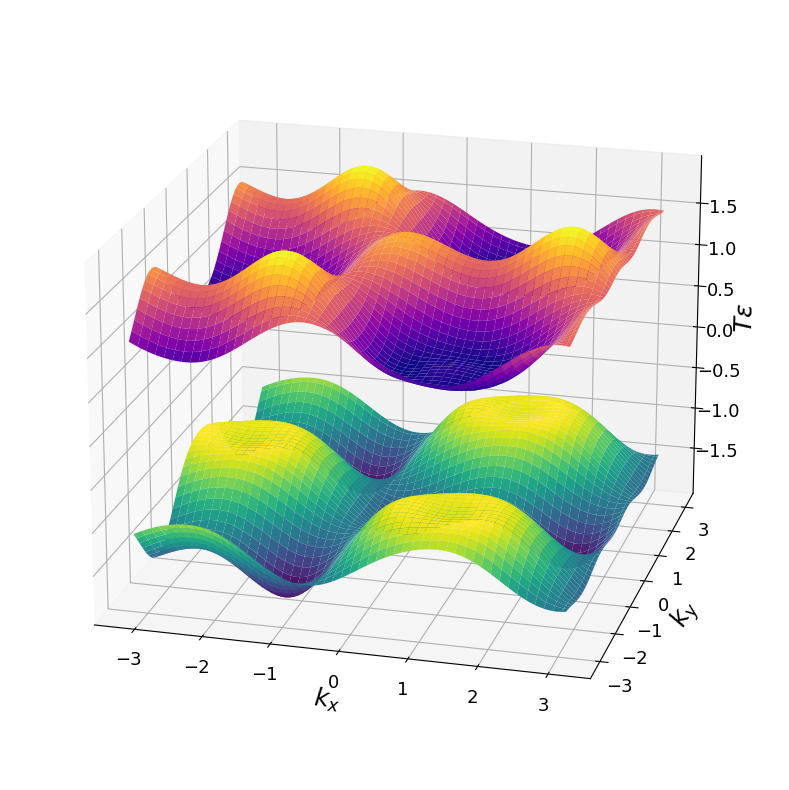

In [87]:
# Create k_x, k_y grid
k_x = np.linspace(-np.pi, np.pi, k_x_div)
k_y = np.linspace(-np.pi, np.pi, k_y_div)
k_x, k_y = np.meshgrid(k_x, k_y)

# Extract eigenvalues for plotting (taking the real part)
eigenvalues_real = np.real(eigenvalues_matrix)

# Plotting the first eigenvalue band
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(k_x, k_y, eigenvalues_real[:, :, 0], cmap='viridis')

# Plotting the second eigenvalue band
ax.plot_surface(k_x, k_y, eigenvalues_real[:, :, 1], cmap='plasma')
fontsize = 18
ax.set_xlabel('$k_x$', fontsize=fontsize)
ax.set_ylabel('$k_y$', fontsize=fontsize)
ax.set_zlabel(r'$T\epsilon$', fontsize=fontsize)  # Set the font size for the z-axis label
labelsize = 13
ax.tick_params(axis='x', labelsize=labelsize)
ax.tick_params(axis='y', labelsize=labelsize)
ax.tick_params(axis='z', labelsize=labelsize)  # Set the font size for the tick labels
# ax.set_title('3D Energy Spectrum')
ax.view_init(elev=20., azim=-75)
  # Set the view angle here
plt.tight_layout()
save_path = "fig1c.pdf"
plt.savefig(save_path, format='pdf', bbox_inches='tight')  # Save with tight bounding box
plt.show()

In [88]:
a = 1.0  # Example value for lattice constant
J_coe = 1.0  # Example value for hopping strength
v = 1.0  # In figure 1
w = 4.0 * J_coe  # In figure 1 (d)
detuning = - 2 * J_coe  # In figure 1 (d)
kappa = 1.0  # In figure 1 (d)
model = tight_binding_floquet(a, v, w, detuning, kappa, J_coe)

In [89]:
# Generate eigenvalues matrix
k_x_div, k_y_div, t_div = 100, 100, 100  # Example divisions
eigenvalues_matrixd = model.eigenvalues_floquet(k_x_div, k_y_div, t_div)

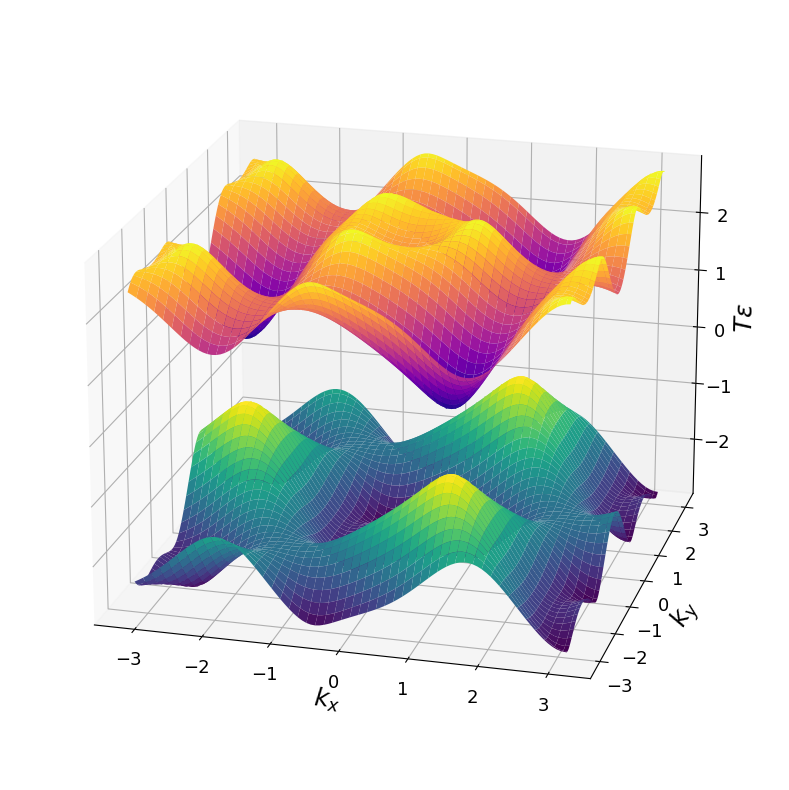

In [90]:
# Create k_x, k_y grid
k_x = np.linspace(-np.pi, np.pi, k_x_div)
k_y = np.linspace(-np.pi, np.pi, k_y_div)
k_x, k_y = np.meshgrid(k_x, k_y)

# Extract eigenvalues for plotting (taking the real part)
eigenvalues_real = np.real(eigenvalues_matrixd)

# Plotting the first eigenvalue band
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(k_x, k_y, eigenvalues_real[:, :, 0], cmap='viridis')

# Plotting the second eigenvalue band
ax.plot_surface(k_x, k_y, eigenvalues_real[:, :, 1], cmap='plasma')
fontsize = 18
ax.set_xlabel('$k_x$', fontsize=fontsize)
ax.set_ylabel('$k_y$', fontsize=fontsize)
ax.set_zlabel(r'$T\epsilon$', fontsize=fontsize)  # Set the font size for the z-axis label
labelsize = 13
ax.tick_params(axis='x', labelsize=labelsize)
ax.tick_params(axis='y', labelsize=labelsize)
ax.tick_params(axis='z', labelsize=labelsize)  # Set the font size for the tick labels
# ax.set_title('3D Energy Spectrum')
ax.view_init(elev=20., azim=-75)
  # Set the view angle here
plt.tight_layout()
save_path = "fig1d.pdf"
plt.savefig(save_path, format='pdf', bbox_inches='tight')  # Save with tight bounding box
plt.show()

In [91]:
a = 1.0  # Example value for lattice constant
J_coe = 1.0  # Example value for hopping strength
v = 1.0  # In figure 1
w = 2.5 * J_coe  # In figure 1 (e)
detuning = -2 * J_coe  # In figure 1 (e)
kappa = 1.5  # In figure 1 (e)
model = tight_binding_floquet(a, v, w, detuning, kappa, J_coe)

In [92]:
# Generate eigenvalues matrix
k_x_div, k_y_div, t_div = 100, 100, 100  # Example divisions
eigenvalues_matrixe = model.eigenvalues_floquet(k_x_div, k_y_div, t_div)

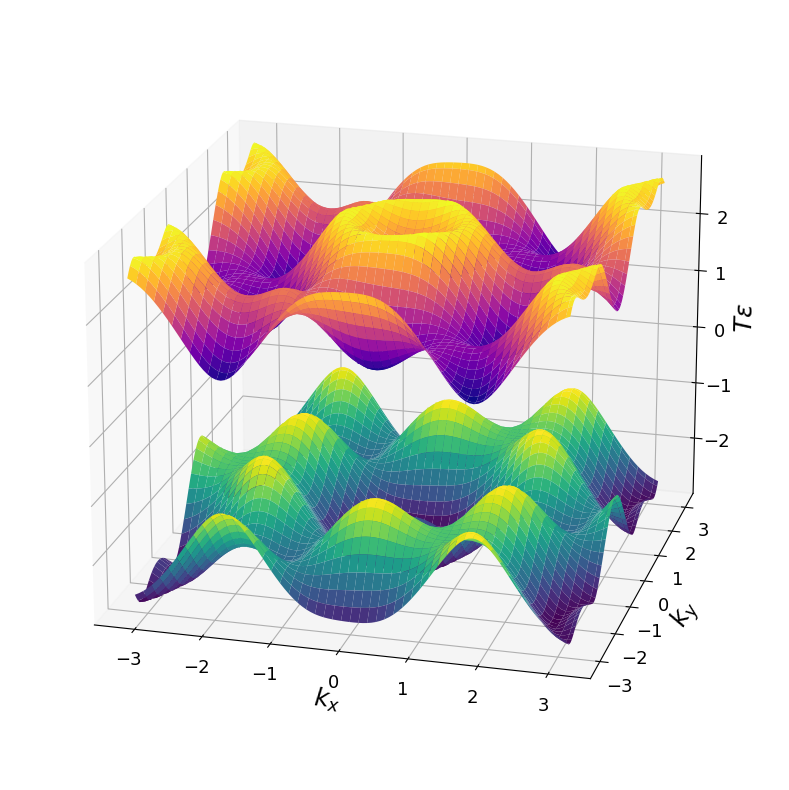

In [93]:
# Create k_x, k_y grid
k_x = np.linspace(-np.pi, np.pi, k_x_div)
k_y = np.linspace(-np.pi, np.pi, k_y_div)
k_x, k_y = np.meshgrid(k_x, k_y)

# Extract eigenvalues for plotting (taking the real part)
eigenvalues_real = np.real(eigenvalues_matrixe)

# Plotting the first eigenvalue band
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(k_x, k_y, eigenvalues_real[:, :, 0], cmap='viridis')

# Plotting the second eigenvalue band
ax.plot_surface(k_x, k_y, eigenvalues_real[:, :, 1], cmap='plasma')
fontsize = 18
ax.set_xlabel('$k_x$', fontsize=fontsize)
ax.set_ylabel('$k_y$', fontsize=fontsize)
ax.set_zlabel(r'$T\epsilon$', fontsize=fontsize)  # Set the font size for the z-axis label
labelsize = 13
ax.tick_params(axis='x', labelsize=labelsize)
ax.tick_params(axis='y', labelsize=labelsize)
ax.tick_params(axis='z', labelsize=labelsize)  # Set the font size for the tick labels
# ax.set_title('3D Energy Spectrum')
ax.view_init(elev=20., azim=-75)
  # Set the view angle here
plt.tight_layout()
save_path = "fig1e.pdf"
plt.savefig(save_path, format='pdf', bbox_inches='tight')  # Save with tight bounding box
plt.show()

In [10]:
class tight_binding_floquet_ribbon_armchair:

    def __init__(self, a, v, w, detuning, kappa, num_cells_y, J_coe):
        self.a = a
        self.drive_strength_kappa = kappa
        self.w = w
        self.num_cells_y = num_cells_y
        self.J_coe = J_coe
        #self.u_1 = (a, 0)
        #self.u_2 = (-1/2*a, -np.sqrt(3)/2*a)
        #self.u_3 = (-1/2*a, np.sqrt(3)/2*a)
        self.E_offset = v*w + detuning
        self.X = np.array([[0+0j, 1+0j],
                          [1+0j, 0+0j]])
        self.Y = np.array([[0+0j, 0-1j],
                          [0+1j, 0+0j]])
        self.Z = np.array([[1+0j, 0+0j],
                          [0+0j, -1+0j]])
    
    def create_block_diagonal(self, h_onsite):
        # Create an identity matrix of size self.num_cells_y
        I = np.eye(self.num_cells_y)
        # Use the Kronecker product to create the block diagonal matrix
        H_onsite = np.kron(I, h_onsite)
        return H_onsite

    def Hamiltonian_kt(self,k_x, t):
        h_onsite = 1/2*self.E_offset * self.Z
        complex_hop_ku1 = self.drive_strength_kappa*np.sin(self.w*t)
        complex_hop_ku2 = self.drive_strength_kappa*np.sin(self.w*t + 2*np.pi/3)
        complex_hop_ku3 = self.drive_strength_kappa*np.sin(self.w*t + 4*np.pi/3)
        # Onsite energy for the Hamiltonian of the ribbon for num_cells_y unit cells
        H_onsite = self.create_block_diagonal(h_onsite)
        #print(H_onsite)
        # Intercell hopping for the Hamiltonian of the ribbon for num_cells_y unit cells
        H_hop_intercell = np.zeros((2*(self.num_cells_y), 2*(self.num_cells_y)), dtype=complex)
        step = 0
        while step < 2* self.num_cells_y and step+3 < 2* self.num_cells_y:
            H_hop_intercell[step][step+3] = -self.J_coe * np.exp(-1j * (k_x * self.a + complex_hop_ku1))
            H_hop_intercell[step+3][step] = -self.J_coe * np.exp(1j * (k_x * self.a + complex_hop_ku1))
            step += 4
        #print(H_hop_intercell)
        # Intracell hopping for the Hamiltonian of the ribbon for num_cells_y unit cells
        H_hop_intracell = np.zeros((2*(self.num_cells_y), 2*(self.num_cells_y)), dtype=complex)
        #print(H_hop_intracell.shape)
        ## For the polar phase is 0
        step_phi0 = 1
        while step_phi0 < 2* self.num_cells_y and step_phi0+1 < 2* self.num_cells_y:
            H_hop_intracell[step_phi0][step_phi0+1] = -self.J_coe * np.exp(1j * (complex_hop_ku1))
            H_hop_intracell[step_phi0+1][step_phi0] = -self.J_coe * np.exp(-1j * (complex_hop_ku1))
            step_phi0 += 4
        ## For the polar phase is 2pi/3
        step_phi1 = 0
        while step_phi1 < 2* self.num_cells_y and step_phi1+5 < 2* self.num_cells_y:
            H_hop_intracell[step_phi1][step_phi1+5] = -self.J_coe * np.exp(-1j * (complex_hop_ku3))
            H_hop_intracell[step_phi1+5][step_phi1] = -self.J_coe * np.exp(1j * (complex_hop_ku3))
            step_phi1 += 4
        step_phi1_2 = 2
        while step_phi1_2 < 2* self.num_cells_y and step_phi1_2+1 < 2* self.num_cells_y:
            H_hop_intracell[step_phi1_2][step_phi1_2+1] = -self.J_coe * np.exp(-1j * (complex_hop_ku3))
            H_hop_intracell[step_phi1_2+1][step_phi1_2] = -self.J_coe * np.exp(1j * (complex_hop_ku3))
            step_phi1_2 += 4
        ## For the polar phase is 4pi/3
        step_phi2 = 0
        while step_phi2 < 2* self.num_cells_y and step_phi2+1 < 2* self.num_cells_y:
            H_hop_intracell[step_phi2][step_phi2+1] = -self.J_coe * np.exp(-1j * (complex_hop_ku2))
            H_hop_intracell[step_phi2+1][step_phi2] = -self.J_coe * np.exp(1j * (complex_hop_ku2))
            step_phi2 += 4
        step_phi2_2 = 3
        while step_phi2_2 < 2* self.num_cells_y and step_phi2_2+3 < 2* self.num_cells_y:
            H_hop_intracell[step_phi2_2][step_phi2_2+3] = -self.J_coe * np.exp(1j * (complex_hop_ku2))
            H_hop_intracell[step_phi2_2+3][step_phi2_2] = -self.J_coe * np.exp(-1j * (complex_hop_ku2))
            step_phi2_2 += 4
        #print(H_hop_intracell)
        # Total Hamiltonian
        Hamiltonian = H_onsite + H_hop_intercell + H_hop_intracell
        return Hamiltonian
    
    def eigenvalues_floquet(self, k_x_div, t_div, recursion_depth=0, max_recursion_depth=5):
        k_x = np.linspace(-np.pi, np.pi, k_x_div)
        t = np.linspace(0, 2*np.pi/self.w, t_div)
        dt = t[1] - t[0]
        basis_states_0 = np.eye(2*(self.num_cells_y), dtype=complex)
        eigenvalues_matrix = np.zeros((len(k_x), 2*(self.num_cells_y)), dtype=complex)
        for index_i, i in enumerate(k_x):
            states = basis_states_0.copy()
            for m in t:
                H = self.Hamiltonian_kt(i, m)
                H_t_plus_half_dt = self.Hamiltonian_kt(i, m + dt/2)
                H_t_plus_dt = self.Hamiltonian_kt(i, m + dt)
                for j in range(2*(self.num_cells_y)):
                    #print("it is", j)
                    state_evolve = states[j].astype(complex)
                    #print("previous state",state_evolve)
                    k_1 = -1j * np.dot(H, state_evolve)
                    k_2 = -1j * np.dot(H_t_plus_half_dt, state_evolve + dt/2 * k_1)
                    k_3 = -1j * np.dot(H_t_plus_half_dt, state_evolve + dt/2 * k_2)
                    k_4 = -1j * np.dot(H_t_plus_dt, state_evolve + dt * k_3)
                    state_evolve += dt/6 * (k_1 + 2*k_2 + 2*k_3 + k_4)
                    state_evolve /= np.linalg.norm(state_evolve)
                    #print("new state",state_evolve)
                    states[j] = state_evolve
                    #print("evolved basis states",states)
            #print("This is basis states", basis_states_0, "This is evolved states", states)
            U_T = np.dot(np.conj(basis_states_0.T), states)
            # Compute the conjugate transpose of U_T
            U_T_dagger = np.conj(U_T).T

            # Compute the product U_T_dagger * U_T
            product = np.dot(U_T_dagger, U_T)
            #print(product)
            # Check if the product is close to the identity matrix
            identity_matrix = np.eye(U_T.shape[0])  # Identity matrix of the same size as U_T
            is_unitary = np.allclose(product, identity_matrix)

            # Print the result
            #print("Is U_T unitary?", is_unitary)
            if not is_unitary:
                if recursion_depth < max_recursion_depth:
                    return self.eigenvalues_floquet(k_x_div, t_div*10, recursion_depth=recursion_depth+1, max_recursion_depth=max_recursion_depth)
                else:
                    raise ValueError("Failed to achieve unitarity within recursion depth limit.")
            eigenvalues = np.linalg.eigvals(U_T)
            # print(eigenvalues)
            E_T = np.log(eigenvalues)/(-1j)
            #print(E_T)
            eigenvalues_matrix[index_i] = E_T
        return eigenvalues_matrix

In [11]:
a = 1.0  # Example value for lattice constant
J_coe = 1.0  # Example value for hopping strength
v = 1.0  # In figure 1
w = 3.0 * J_coe  # In figure 1 (c)
detuning = -2.0 * J_coe  # In figure 1 (c)
kappa = 2.0  # In figure 1 (c)
num_cells_y = 100
model = tight_binding_floquet_ribbon_armchair(a, v, w, detuning, kappa, num_cells_y, J_coe)

In [12]:
figcc = model.eigenvalues_floquet(150, 100)

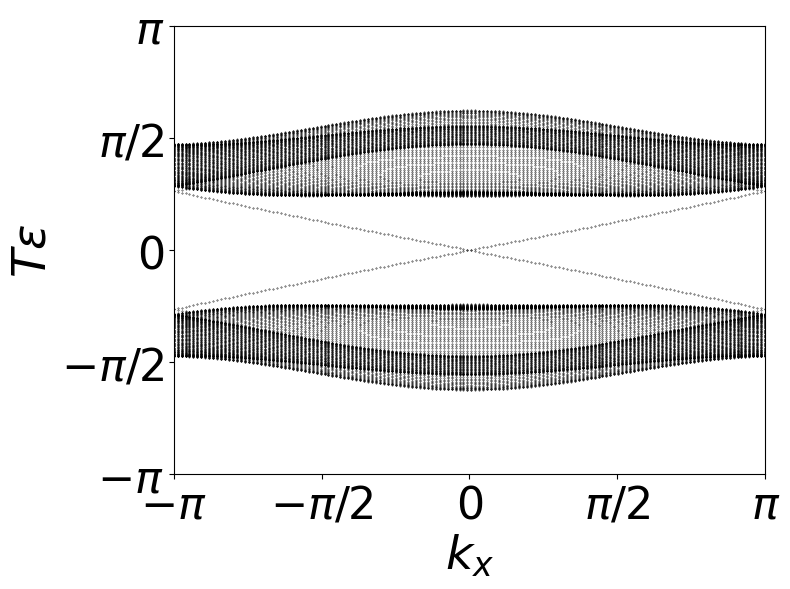

In [17]:
plt.figure(figsize=(8, 6))
k_x = np.linspace(-np.pi, np.pi, 150)  # 100 k_x values

# Assuming figcc is defined and has a shape of (100, 22)
# Iterate over each row (each k_x value) and plot the corresponding y-axis points
for i in range(len(k_x)):  # Iterate over each k_x value
    plt.scatter([k_x[i]] * figcc.shape[1], figcc[i, :], color='black', s=0.1)

plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

# Set x and y ticks
plt.xticks(ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=32)
plt.yticks(ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=32)

# plt.title('Fig 1 (c) Floquet Spectrum of Tight Binding Graphene Model', fontsize=34)  # Title is commented out
plt.xlabel(r'$k_x$', fontsize=34)
plt.ylabel(r'$T\epsilon$', fontsize=34)

# Apply tight layout
plt.tight_layout()

# Save the figure
save_path = 'figcc.pdf'  # Specify your desired save path
plt.savefig(save_path, format='pdf', bbox_inches='tight')  # Save with tight bounding box

plt.show()

In [14]:
a = 1.0  # Example value for lattice constant
J_coe = 1  # Example value for hopping strength
v = 1.0  # In figure 1
w = 4 * J_coe  # In figure 1 (d)
detuning = -2 * J_coe  # In figure 1 (d)
kappa = 1.0  # In figure 1 (d)
num_cells_y = 100
modeld = tight_binding_floquet_ribbon_armchair(a, v, w, detuning, kappa, num_cells_y, J_coe)

In [15]:
figdd = modeld.eigenvalues_floquet(150, 100)

c:\Users\11952\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


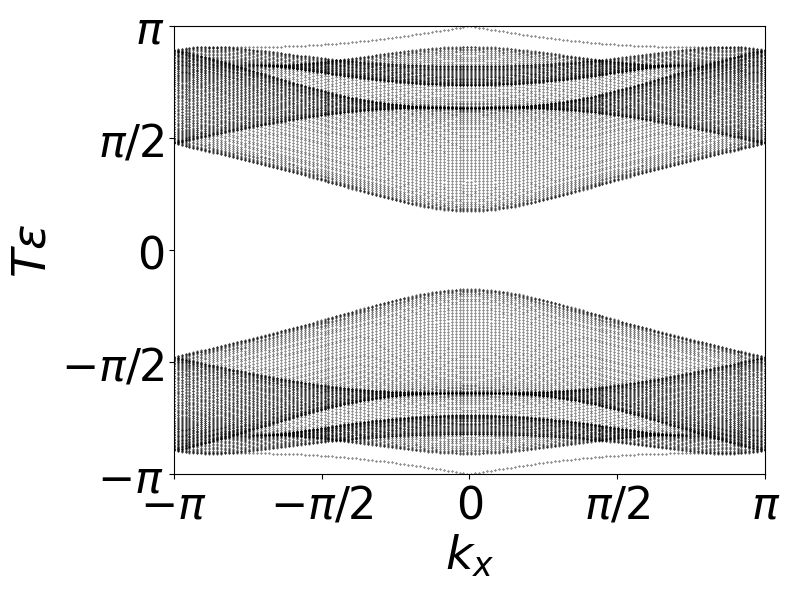

In [18]:
plt.figure(figsize=(8, 6))
k_x = np.linspace(-np.pi, np.pi, 150)  # 100 k_x values

# Assuming figdd is defined and has a shape of (100, 22)
# Iterate over each row (each k_x value) and plot the corresponding y-axis points
for i in range(len(k_x)):  # Iterate over each k_x value
    plt.scatter([k_x[i]] * figdd.shape[1], figdd[i, :], color='black', s=0.1)

plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

# Set x and y ticks
plt.xticks(ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=32)
plt.yticks(ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=32)

# Comment out the title
# plt.title('Fig 1 (d) Floquet Spectrum of Tight Binding Graphene Model', fontsize=34)  # Title is commented out
plt.xlabel(r'$k_x$', fontsize=34)
plt.ylabel(r'$T\epsilon$', fontsize=34)

# Apply tight layout
plt.tight_layout()

# Save the figure
save_path = 'figdd.pdf'  # Specify your desired save path
plt.savefig(save_path, format='pdf', bbox_inches='tight')

plt.show()

In [19]:
a = 1.0  # Example value for lattice constant
J_coe = 1.0  # Example value for hopping strength
v = 1.0  # In figure 1
w = 2.5 * J_coe  # In figure 1 (e)
detuning = -2 * J_coe  # In figure 1 (e)
kappa = 1.5  # In figure 1 (e)
num_cells_y = 100
modele = tight_binding_floquet_ribbon_armchair(a, v, w, detuning, kappa, num_cells_y, J_coe)

In [20]:
figee = modele.eigenvalues_floquet(150, 100)

c:\Users\11952\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


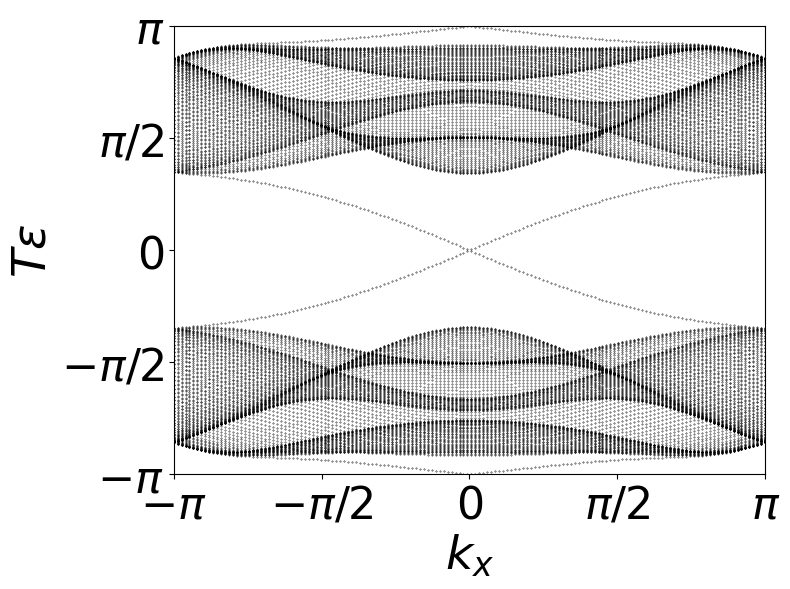

In [21]:
plt.figure(figsize=(8, 6))
k_x = np.linspace(-np.pi, np.pi, 150)  # 100 k_x values

# Assuming figee is defined and has a shape of (100, 22)
# Iterate over each row (each k_x value) and plot the corresponding y-axis points
for i in range(len(k_x)):  # Iterate over each k_x value
    plt.scatter([k_x[i]] * figee.shape[1], figee[i, :], color='black', s=0.1)

plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

# Set x and y ticks
plt.xticks(ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=32)
plt.yticks(ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=32)

# Comment out the title
# plt.title('Fig 1 (e) Floquet Spectrum of Tight Binding Graphene Model', fontsize=34)  # Title is commented out
plt.xlabel(r'$k_x$', fontsize=34)
plt.ylabel(r'$T\epsilon$', fontsize=34)

# Apply tight layout
plt.tight_layout()

# Save the figure
save_path = 'figee.pdf'  # Specify your desired save path
plt.savefig(save_path, format='pdf', bbox_inches='tight')

plt.show()


In [200]:
class tight_binding_floquet_ribbon_armchair2:

    def __init__(self, a, v, w, detuning, kappa, num_cells_y, J_coe):
        self.a = a
        self.drive_strength_kappa = kappa
        self.w = w
        self.num_cells_y = num_cells_y
        self.J_coe = J_coe
        #self.u_1 = (a, 0)
        #self.u_2 = (-1/2*a, -np.sqrt(3)/2*a)
        #self.u_3 = (-1/2*a, np.sqrt(3)/2*a)
        self.E_offset = v*w + detuning
        self.X = np.array([[0+0j, 1+0j],
                          [1+0j, 0+0j]])
        self.Y = np.array([[0+0j, 0-1j],
                          [0+1j, 0+0j]])
        self.Z = np.array([[1+0j, 0+0j],
                          [0+0j, -1+0j]])
        
    def stepwise_driving1(self, t):
        T = 2*np.pi/self.w
        if t <= T/3:
            return self.J_coe
        else:
            return 0
    
    def stepwise_driving2(self, t):
        T = 2*np.pi/self.w
        if T/3 < t <= 2*T/3:
            return self.J_coe
        else:
            return 0
    
    def stepwise_driving3(self, t):
        T = 2*np.pi/self.w
        if 2*T/3 < t <= T:
            return self.J_coe
        else:
            return 0
    
    def create_block_diagonal(self, h_onsite):
        # Create an identity matrix of size self.num_cells_y
        I = np.eye(self.num_cells_y)
        # Use the Kronecker product to create the block diagonal matrix
        H_onsite = np.kron(I, h_onsite)
        return H_onsite

    def Hamiltonian_kt(self,k_x, t):
        h_onsite = 1/2*self.E_offset * self.Z
        # Onsite energy for the Hamiltonian of the ribbon for num_cells_y unit cells
        H_onsite = self.create_block_diagonal(h_onsite)
        # Intercell hopping for the Hamiltonian of the ribbon for num_cells_y unit cells
        H_hop_intercell = np.zeros((2*(self.num_cells_y), 2*(self.num_cells_y)), dtype=complex)
        step = 0
        while step < 2* self.num_cells_y and step+3 < 2* self.num_cells_y:
            H_hop_intercell[step][step+3] = - self.stepwise_driving1(t) * np.exp(-1j * k_x*self.a)
            H_hop_intercell[step+3][step] = - self.stepwise_driving1(t) * np.exp(1j * k_x*self.a)
            step += 4
        # Intracell hopping for the Hamiltonian of the ribbon for num_cells_y unit cells
        H_hop_intracell = np.zeros((2*(self.num_cells_y), 2*(self.num_cells_y)), dtype=complex)
        ## For vector u1
        step_phi0 = 1
        while step_phi0 < 2* self.num_cells_y and step_phi0+1 < 2* self.num_cells_y:
            H_hop_intracell[step_phi0][step_phi0+1] = - self.stepwise_driving1(t)
            H_hop_intracell[step_phi0+1][step_phi0] = - self.stepwise_driving1(t)
            step_phi0 += 4
        ## For vector u3
        step_phi1 = 0
        while step_phi1 < 2* self.num_cells_y and step_phi1+5 < 2* self.num_cells_y:
            H_hop_intracell[step_phi1][step_phi1+5] = - self.stepwise_driving2(t)
            H_hop_intracell[step_phi1+5][step_phi1] = - self.stepwise_driving2(t)
            step_phi1 += 4
        step_phi1_2 = 2
        while step_phi1_2 < 2* self.num_cells_y and step_phi1_2+1 < 2* self.num_cells_y:
            H_hop_intracell[step_phi1_2][step_phi1_2+1] = - self.stepwise_driving2(t)
            H_hop_intracell[step_phi1_2+1][step_phi1_2] = - self.stepwise_driving2(t)
            step_phi1_2 += 4
        ## For vector u2
        step_phi2 = 0
        while step_phi2 < 2* self.num_cells_y and step_phi2+1 < 2* self.num_cells_y:
            H_hop_intracell[step_phi2][step_phi2+1] = - self.stepwise_driving3(t)
            H_hop_intracell[step_phi2+1][step_phi2] = - self.stepwise_driving3(t)
            step_phi2 += 4
        step_phi2_2 = 3
        while step_phi2_2 < 2* self.num_cells_y and step_phi2_2+3 < 2* self.num_cells_y:
            H_hop_intracell[step_phi2_2][step_phi2_2+3] = - self.stepwise_driving3(t)
            H_hop_intracell[step_phi2_2+3][step_phi2_2] = - self.stepwise_driving3(t)
            step_phi2_2 += 4
        # Total Hamiltonian
        Hamiltonian = H_onsite + H_hop_intercell + H_hop_intracell
        return Hamiltonian
    
    def eigenvalues_floquet(self, k_x_div, t_div, recursion_depth=0, max_recursion_depth=5):
        k_x = np.linspace(-np.pi, np.pi, k_x_div)
        t = np.linspace(0, 2*np.pi/self.w, t_div)
        dt = t[1] - t[0]
        basis_states_0 = np.eye(2*(self.num_cells_y), dtype=complex)
        eigenvalues_matrix = np.zeros((len(k_x), 2*(num_cells_y)), dtype=complex)
        for index_i, i in enumerate(k_x):
            states = basis_states_0.copy()
            for m in t:
                H = self.Hamiltonian_kt(i, m)
                H_t_plus_half_dt = self.Hamiltonian_kt(i, m + dt/2)
                H_t_plus_dt = self.Hamiltonian_kt(i, m + dt)
                for j in range(2*(self.num_cells_y)):
                    #print("it is", j)
                    state_evolve = states[j].astype(complex)
                    #print("previous state",state_evolve)
                    k_1 = -1j * np.dot(H, state_evolve)
                    k_2 = -1j * np.dot(H_t_plus_half_dt, state_evolve + dt/2 * k_1)
                    k_3 = -1j * np.dot(H_t_plus_half_dt, state_evolve + dt/2 * k_2)
                    k_4 = -1j * np.dot(H_t_plus_dt, state_evolve + dt * k_3)
                    state_evolve += dt/6 * (k_1 + 2*k_2 + 2*k_3 + k_4)
                    state_evolve /= np.linalg.norm(state_evolve)
                    #print("new state",state_evolve)
                    states[j] = state_evolve
                    #print("evolved basis states",states)
            U_T = np.dot(np.conj(basis_states_0.T), states)
            # Compute the conjugate transpose of U_T
            U_T_dagger = np.conj(U_T).T

            # Compute the product U_T_dagger * U_T
            product = np.dot(U_T_dagger, U_T)
            #print(product)
            # Check if the product is close to the identity matrix
            identity_matrix = np.eye(U_T.shape[0])  # Identity matrix of the same size as U_T
            is_unitary = np.allclose(product, identity_matrix)

            # Print the result
            #print("Is U_T unitary?", is_unitary)
            if not is_unitary:
                if recursion_depth < max_recursion_depth:
                    return self.eigenvalues_floquet(k_x_div, t_div*10, recursion_depth=recursion_depth+1, max_recursion_depth=max_recursion_depth)
                else:
                    raise ValueError("Failed to achieve unitarity within recursion depth limit.")
            eigenvalues = np.linalg.eigvals(U_T)
            E_T = np.log(eigenvalues)/(-1j)
            #print(E_T)
            eigenvalues_matrix[index_i] = E_T
        return eigenvalues_matrix

In [201]:
a = 1.0  # Example value for lattice constant
J_coe = 1.0  # Example value for hopping strength
v = 0  # In figure 1
w = 3.0 * J_coe  # In figure 1 (c)
detuning = 0
kappa = 2.0  # In figure 1 (c)
num_cells_y = 30
model2 = tight_binding_floquet_ribbon_armchair2(a, v, w, detuning, kappa, num_cells_y, J_coe)

In [202]:
figc2 = model2.Hamiltonian_kt(0, 0)
rows, cols = figc2.shape

# Print number of rows and columns
print("Number of rows:", rows)
print("Number of columns:", cols)
print(figc2)

Number of rows: 60
Number of columns: 60
[[ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ... -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]]


In [203]:
figcc2 = model2.eigenvalues_floquet(100, 100)

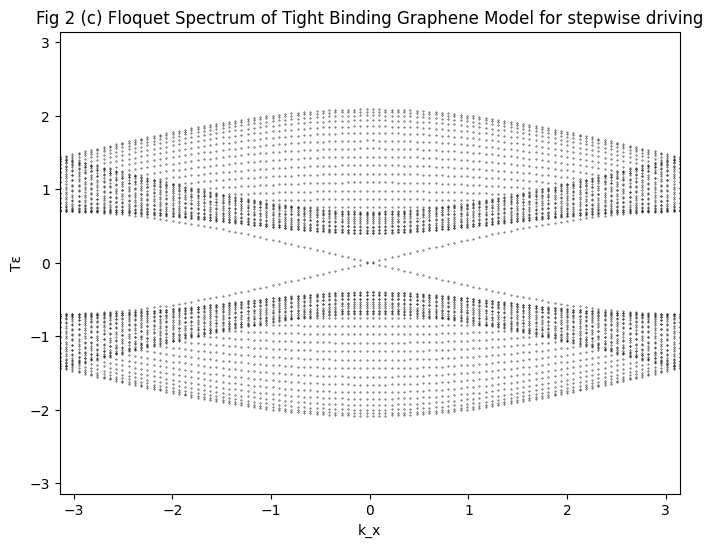

In [206]:
plt.figure(figsize=(8, 6))
k_x = np.linspace(-np.pi, np.pi, 100)  # 100 k_x values

# Assuming aa is defined and has a shape of (100, 22)
# Iterate over each row (each k_x value) and plot the corresponding y-axis points
for i in range(len(k_x)):  # Iterate over each k_x value
    plt.scatter([k_x[i]] * figcc2.shape[1], figcc2[i, :], color='black', s=0.1)

plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.title('Fig 2 (c) Floquet Spectrum of Tight Binding Graphene Model for stepwise driving')
plt.xlabel('k_x')
plt.ylabel('T\u03B5')
plt.show()

In [22]:
class tight_binding_floquet_fig3:

    def __init__(self, a, E_offset, kappa, J_coe):
        self.a = a
        self.drive_strength_kappa = kappa
        self.J_coe = J_coe
        self.u_1 = (a, 0)
        self.u_2 = (-1/2*a, -np.sqrt(3)/2*a)
        self.u_3 = (-1/2*a, np.sqrt(3)/2*a)
        self.E_offset = E_offset
        self.X = np.array([[0+0j, 1+0j],
                          [1+0j, 0+0j]])
        self.Y = np.array([[0+0j, 0-1j],
                          [0+1j, 0+0j]])
        self.Z = np.array([[1+0j, 0+0j],
                          [0+0j, -1+0j]])
        

    def Hamiltonian_kt(self,k_vector, t, _lambda):
        w_lamda = -7 * self.J_coe * _lambda + 10 * self.J_coe
        h_onsite = 1/2*self.E_offset * self.Z
        dot_ku1 = np.dot(k_vector,self.u_1)
        complex_hop_ku1 = self.drive_strength_kappa*np.sin(w_lamda*t)
        complex_hop_ku2 = self.drive_strength_kappa*np.sin(w_lamda*t + 2*np.pi/3)
        complex_hop_ku3 = self.drive_strength_kappa*np.sin(w_lamda*t + 4*np.pi/3)
        dot_ku2 = np.dot(k_vector,self.u_2)
        dot_ku3 = np.dot(k_vector,self.u_3)
        h_hop = -self. J_coe*((np.cos(dot_ku1+complex_hop_ku1)+np.cos(dot_ku2+complex_hop_ku2)+ np.cos(dot_ku3+complex_hop_ku3))*self.X 
                        - (np.sin(dot_ku1+complex_hop_ku1) + np.sin(dot_ku2+complex_hop_ku2) + np.sin(dot_ku3+complex_hop_ku3))*self.Y)
        Hamiltonian = h_hop + h_onsite
        return Hamiltonian

    def eigenvalues_floquet(self, k_x_div, k_y_div, lambda_div, t_div):
        k_x = np.linspace(-np.pi, np.pi, k_x_div)
        k_y = np.linspace(-np.pi, np.pi, k_y_div)
        _lambda = np.linspace(0, 1, lambda_div)
        eigenvalues_matrix = np.zeros((len(_lambda), len(k_x), len(k_y), 2),dtype=complex)
        for index_lambda, lambda_val in enumerate(_lambda):
            w_lamda = -7 * self.J_coe * lambda_val + 10 * self.J_coe
            t = np.linspace(0, 2*np.pi/w_lamda, t_div)
            dt = t[1] - t[0]
            basis_states_0 = np.eye(2, dtype=complex)
            for index_i, i in enumerate(k_x):
                for index_j, j in enumerate(k_y):
                    k_vector = np.array([i, j])
                    basis_states = basis_states_0.copy()
                    for m in t:
                        H = self.Hamiltonian_kt(k_vector, m, lambda_val)
                        H_t_plus_half_dt = self.Hamiltonian_kt(k_vector, m + dt/2, lambda_val)
                        H_t_plus_dt = self.Hamiltonian_kt(k_vector, m + dt, lambda_val)
                        for n in range(2):
                            state_evolve = basis_states[n].astype(complex)
                            k_1 = -1j * np.dot(H, state_evolve)
                            k_2 = -1j * np.dot(H_t_plus_half_dt, state_evolve + dt/2 * k_1)
                            k_3 = -1j * np.dot(H_t_plus_half_dt, state_evolve + dt/2 * k_2)
                            k_4 = -1j * np.dot(H_t_plus_dt, state_evolve + dt * k_3)
                            state_evolve += dt/6 * (k_1 + 2*k_2 + 2*k_3 + k_4)
                            state_evolve /= np.linalg.norm(state_evolve)
                            basis_states[n] = state_evolve
                    U_T = np.dot(np.conj(basis_states_0.T), basis_states)
                    # Compute the conjugate transpose of U_T
                    U_T_dagger = np.conj(U_T).T

                    # Compute the product U_T_dagger * U_T
                    product = np.dot(U_T_dagger, U_T)
                    #print(product)
                    # Check if the product is close to the identity matrix
                    identity_matrix = np.eye(U_T.shape[0])  # Identity matrix of the same size as U_T
                    #is_unitary = np.allclose(product, identity_matrix)
                    eigenvalues = np.linalg.eigvals(U_T)
                    E_T = np.log(eigenvalues)/(-1j)
                    #print(E_T)
                    eigenvalues_matrix[index_lambda][index_i][index_j] = E_T
        return eigenvalues_matrix

In [23]:
a1 = 1.0  # Example value for lattice constant
J_coe = 1.0  # Example value for hopping strength
E_offset = J_coe
kappa = 1.5 # In figure 3

bulk_lamda_model = tight_binding_floquet_fig3(a1, E_offset, kappa, J_coe)

In [24]:
k_x_div = 100  # Number of k_x values
k_y_div = 100  # Number of k_y values
lambda_div = 150  # Number of lambda values
t_div = 100  # Number of t values

fig333 = bulk_lamda_model.eigenvalues_floquet(k_x_div, k_y_div, lambda_div, t_div)

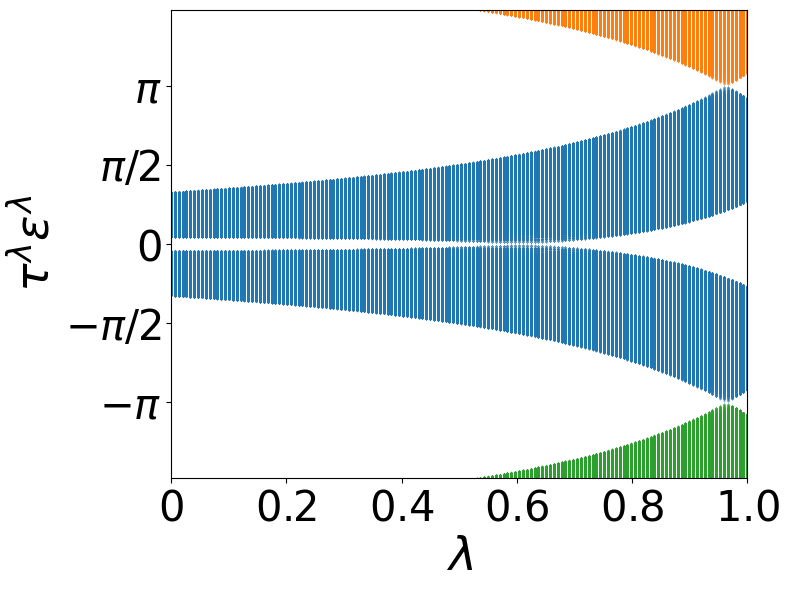

In [94]:
_lambda = np.linspace(0, 1, lambda_div)  # Define lambda_div
lambda_repeat = np.tile(_lambda, k_x_div * k_y_div * 2)  # Repeat lambda for each kx, ky, and eigenvalue

eigenvalues_all = []  # To store all eigenvalues

for index_kx in range(k_x_div):
    for index_ky in range(k_y_div):
        for eigen_index in range(2):  # Assuming there are 2 eigenvalues
            eigenvalues = fig333[:, index_kx, index_ky, eigen_index].real.flatten()
            eigenvalues_all.extend(eigenvalues)

# Convert to numpy array for efficient plotting
eigenvalues_all = np.array(eigenvalues_all)

eigenvalues_plus_pi = eigenvalues_all + 2*np.pi # Adding 2*pi to eigenvalues
eigenvalues_minus_pi = eigenvalues_all - 2*np.pi # Subtracting 2*pi from eigenvalues

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(lambda_repeat, eigenvalues_all, s=0.01)  # s is the size of the marker
ax.scatter(lambda_repeat, eigenvalues_plus_pi, s=0.01)
ax.scatter(lambda_repeat, eigenvalues_minus_pi, s=0.01)

# Set x and y ticks
x_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
ax.set_xticks(x_ticks)
ax.set_xticklabels([r'$0$', r'$0.2$', r'$0.4$', r'$0.6$', r'$0.8$', r'$1.0$'], fontsize=30)  # Set x-axis tick label font size

y_ticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
y_ticklabels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels, fontsize=30)  # Set y-axis tick label font size

# Set up the limits for y-axis
ax.set_xlim(0, 1)
ax.set_ylim(-np.pi - 1.5, np.pi + 1.5)

ax.set_xlabel(r'$\lambda$', fontsize=34)
ax.set_ylabel(r'$\tau^{\lambda} \varepsilon^{\lambda}$', fontsize=34)

# Apply tight layout
plt.tight_layout()

# Save the figure
save_path = 'family_drive.pdf'  # Specify your desired save path
fig.savefig(save_path, format='pdf', bbox_inches='tight')  # Save with tight bounding box

plt.show()

In [95]:
a = 1.0  # Example value for lattice constant
J_coe = 1.0  # Example value for hopping strength
vv = 1.0  # In figure 3
kappa = 1.5  # In figure 3
lamda1 = 0.57
w_lamda1 = -7 * J_coe * lamda1 + 10 * J_coe
detuning1 = 1 - w_lamda1 * vv
lamda2 = 0.96
w_lamda2 = -7 * J_coe * lamda2 + 10 * J_coe
detuning2 = 1 - w_lamda2 * vv

num_cells_y = 60
model3_1 = tight_binding_floquet_ribbon_armchair(a, v, w_lamda1, detuning1, kappa, num_cells_y, J_coe)
model3_2 = tight_binding_floquet_ribbon_armchair(a, v, w_lamda2, detuning2, kappa, num_cells_y, J_coe)

In [96]:
figc3_1 = model3_1.eigenvalues_floquet(100, 100)

c:\Users\11952\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


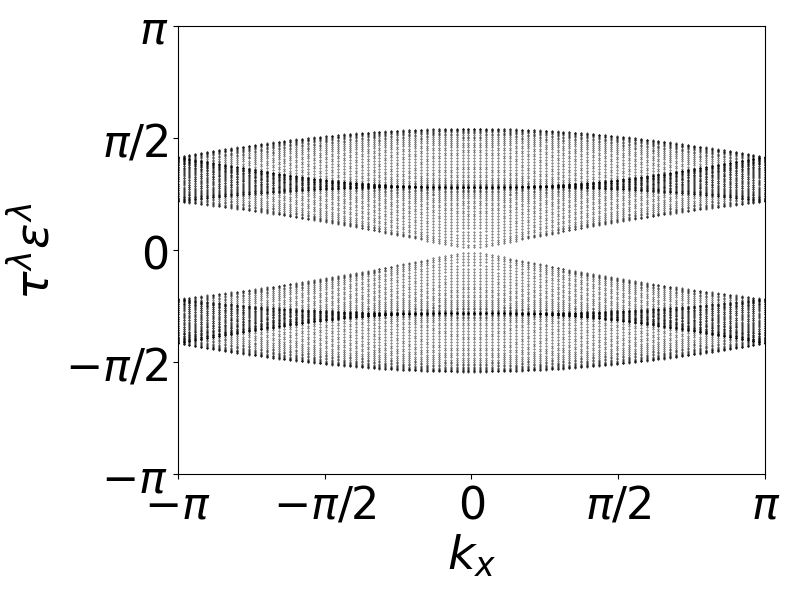

In [97]:
plt.figure(figsize=(8, 6))
k_x = np.linspace(-np.pi, np.pi, 100)  # 100 k_x values

# Iterate over each row (each k_x value) and plot the corresponding y-axis points
for i in range(len(k_x)):  # Iterate over each k_x value
    plt.scatter([k_x[i]] * figc3_1.shape[1], figc3_1[i, :], color='black', s=0.1)

plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

# Set tick values and labels
x_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
x_ticklabels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
y_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
y_ticklabels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']

plt.xticks(ticks=x_ticks, labels=x_ticklabels, fontsize=32)
plt.yticks(ticks=y_ticks, labels=y_ticklabels, fontsize=32)

# Set axis labels
plt.xlabel(r'$k_x$', fontsize=34)
plt.ylabel(r'$\tau^{\lambda}\varepsilon^{\lambda}$', fontsize=34)

# Apply tight layout
plt.tight_layout()

# Save the figure
save_path = 'figc3_1.pdf'  # Specify your desired save path
plt.savefig(save_path, format='pdf', bbox_inches='tight')  # Save with tight bounding box

plt.show()

In [98]:
fig3_2 = model3_2.eigenvalues_floquet(100, 100)

c:\Users\11952\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


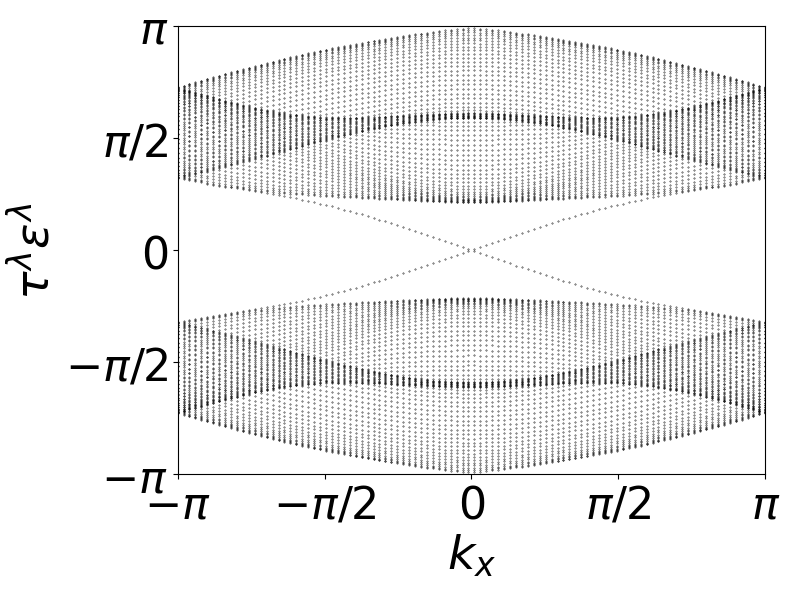

In [99]:
plt.figure(figsize=(8, 6))
k_x = np.linspace(-np.pi, np.pi, 100)  # 100 k_x values

# Iterate over each row (each k_x value) and plot the corresponding y-axis points
for i in range(len(k_x)):  # Iterate over each k_x value
    plt.scatter([k_x[i]] * fig3_2.shape[1], fig3_2[i, :], color='black', s=0.1)

plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

# Set tick values and labels
x_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
x_ticklabels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
y_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
y_ticklabels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']

plt.xticks(ticks=x_ticks, labels=x_ticklabels, fontsize=32)
plt.yticks(ticks=y_ticks, labels=y_ticklabels, fontsize=32)

# Set axis labels
plt.xlabel(r'$k_x$', fontsize=34)
plt.ylabel(r'$\tau^{\lambda}\varepsilon^{\lambda}$', fontsize=34)

# Apply tight layout
plt.tight_layout()

# Save the figure
save_path = 'fig3_2.pdf'  # Specify your desired save path
plt.savefig(save_path, format='pdf', bbox_inches='tight')  # Save with tight bounding box

plt.show()

In [100]:
kappa = 1.5  # In figure 3
lamda3 = 0.4
w_lamda3 = -7 * J_coe * lamda3 + 10 * J_coe
detuning3 = 1 - w_lamda3 * vv

lamda4 = 0.8
w_lamda4 = -7 * J_coe * lamda4 + 10 * J_coe
detuning4 = 1 - w_lamda4 * vv

lamda5 = 1.0
w_lamda5 = -7 * J_coe * lamda5 + 10 * J_coe
detuning5 = 1 - w_lamda5 * vv

num_cells_y = 60

model3_3 = tight_binding_floquet_ribbon_armchair(a, v, w_lamda3, detuning3, kappa, num_cells_y, J_coe)
model3_4 = tight_binding_floquet_ribbon_armchair(a, v, w_lamda4, detuning4, kappa, num_cells_y, J_coe)
model3_5 = tight_binding_floquet_ribbon_armchair(a, v, w_lamda5, detuning5, kappa, num_cells_y, J_coe)

In [101]:
fig3_3 = model3_3.eigenvalues_floquet(100, 100)

c:\Users\11952\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


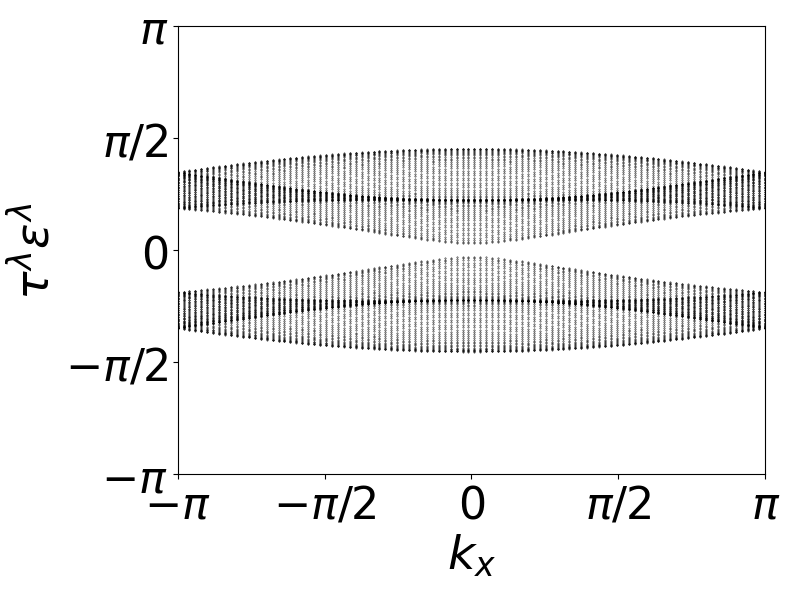

In [102]:
plt.figure(figsize=(8, 6))
k_x = np.linspace(-np.pi, np.pi, 100)  # 100 k_x values

# Iterate over each row (each k_x value) and plot the corresponding y-axis points
for i in range(len(k_x)):  # Iterate over each k_x value
    plt.scatter([k_x[i]] * fig3_3.shape[1], fig3_3[i, :], color='black', s=0.1)

plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

# Set tick values and labels
x_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
x_ticklabels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
y_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
y_ticklabels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']

plt.xticks(ticks=x_ticks, labels=x_ticklabels, fontsize=32)
plt.yticks(ticks=y_ticks, labels=y_ticklabels, fontsize=32)

# Set axis labels
plt.xlabel(r'$k_x$', fontsize=34)
plt.ylabel(r'$\tau^{\lambda}\varepsilon^{\lambda}$', fontsize=34)

# Apply tight layout
plt.tight_layout()

# Save the figure
save_path = 'fig3_3.pdf'  # Specify your desired save path
plt.savefig(save_path, format='pdf', bbox_inches='tight')  # Save with tight bounding box

plt.show()

In [103]:
fig3_4 = model3_4.eigenvalues_floquet(100, 100)

c:\Users\11952\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


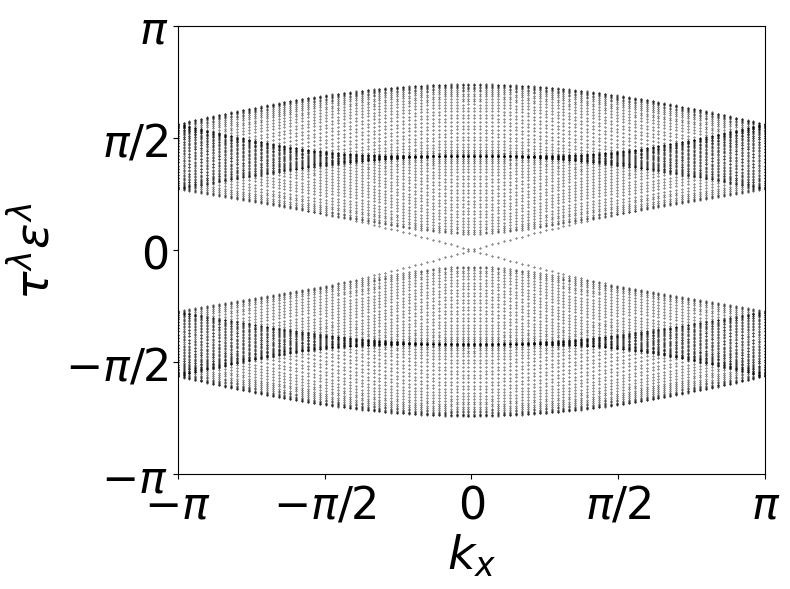

In [104]:
plt.figure(figsize=(8, 6))
k_x = np.linspace(-np.pi, np.pi, 100)  # 100 k_x values

# Iterate over each row (each k_x value) and plot the corresponding y-axis points
for i in range(len(k_x)):  # Iterate over each k_x value
    plt.scatter([k_x[i]] * fig3_4.shape[1], fig3_4[i, :], color='black', s=0.1)

plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

# Set tick values and labels
x_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
x_ticklabels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
y_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
y_ticklabels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']

plt.xticks(ticks=x_ticks, labels=x_ticklabels, fontsize=32)
plt.yticks(ticks=y_ticks, labels=y_ticklabels, fontsize=32)

# Set axis labels
plt.xlabel(r'$k_x$', fontsize=34)
plt.ylabel(r'$\tau^{\lambda}\varepsilon^{\lambda}$', fontsize=34)

# Apply tight layout
plt.tight_layout()

# Save the figure
save_path = 'fig3_4.pdf'  # Specify your desired save path
plt.savefig(save_path, format='pdf', bbox_inches='tight')  # Save with tight bounding box

plt.show()

In [105]:
fig3_5 = model3_5.eigenvalues_floquet(100, 100)

c:\Users\11952\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


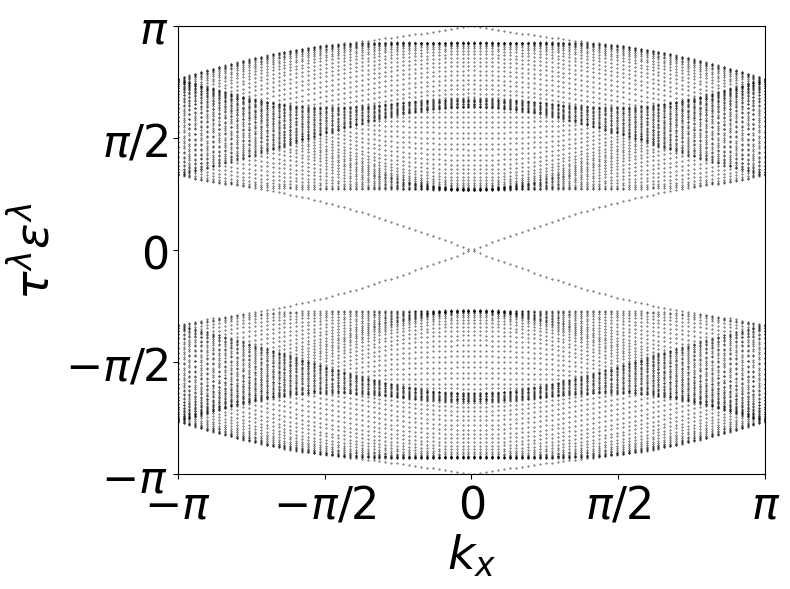

In [106]:
plt.figure(figsize=(8, 6))
k_x = np.linspace(-np.pi, np.pi, 100)  # 100 k_x values

# Iterate over each row (each k_x value) and plot the corresponding y-axis points
for i in range(len(k_x)):  # Iterate over each k_x value
    plt.scatter([k_x[i]] * fig3_5.shape[1], fig3_5[i, :], color='black', s=0.1)

plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

# Set tick values and labels
x_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
x_ticklabels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
y_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
y_ticklabels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']

plt.xticks(ticks=x_ticks, labels=x_ticklabels, fontsize=32)
plt.yticks(ticks=y_ticks, labels=y_ticklabels, fontsize=32)

# Set axis labels
plt.xlabel(r'$k_x$', fontsize=34)
plt.ylabel(r'$\tau^{\lambda}\varepsilon^{\lambda}$', fontsize=34)

# Apply tight layout
plt.tight_layout()

# Save the figure
save_path = 'fig3_5.pdf'  # Specify your desired save path
plt.savefig(save_path, format='pdf', bbox_inches='tight')  # Save with tight bounding box

plt.show()